In [1]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import coint
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLV', 'XLY', 'XLU', 'XLRE', 'XLC']

prices = yf.download(tickers, start = '2010-01-01', end = '2020-12-31')['Close']

prices.dropna(inplace=True)
returns = prices.pct_change().dropna()

scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns.T)

returns_scaled



/var/folders/qd/xclxh05s0x9509nblm6z434w0000gp/T/ipykernel_36255/2099229847.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start = '2010-01-01', end = '2020-12-31')['Close']
[*********************100%***********************]  11 of 11 completed


array([[-1.34183178, -0.7486939 ,  1.27375469, ..., -1.39260135,
         0.09665879,  1.51370883],
       [ 2.00933827, -0.09714942, -0.16523225, ...,  1.87534355,
         0.53041178, -1.79187912],
       [ 0.29839289, -1.88847297,  2.03493852, ..., -1.74885803,
        -1.12644956,  1.82097711],
       ...,
       [-0.47595772,  1.2785406 ,  0.19755704, ..., -0.14908707,
         0.7413292 ,  0.10219271],
       [-0.19261542, -0.04409702, -0.14855624, ..., -0.43282054,
         2.16459658, -0.74155082],
       [ 0.36816807, -0.24090834, -1.02416001, ...,  0.89541585,
         0.87935063,  0.25846258]])

In [2]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(returns_scaled)

pca_components

array([[  6.43940134,  -0.37715086],
       [ -1.72295387,  16.65880415],
       [ 30.77816806, -16.34101306],
       [ 10.12733611,  -1.73393384],
       [  8.08424054,  -1.28962591],
       [  0.49412596,  21.06244769],
       [-12.32951417,  -5.71780007],
       [-16.32865493, -10.90743584],
       [-21.0314811 , -14.71974918],
       [ -5.77106404,   3.32358444],
       [  1.2603961 ,  10.04187247]])

In [3]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(pca_components)

labels

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1], dtype=int32)

In [4]:
cluster_df = pd.DataFrame({
    'ETF': returns.columns,
    'Cluster': labels,
    'PC1': pca_components[:, 0],
    'PC2': pca_components[:, 1]
})

cluster_df

,ETF,Cluster,PC1,PC2
0,XLB,1,6.439401,-0.377151
1,XLC,1,-1.722954,16.658804
2,XLE,0,30.778168,-16.341013
3,XLF,1,10.127336,-1.733934
4,XLI,1,8.084241,-1.289626
5,XLK,1,0.494126,21.062448
6,XLP,2,-12.329514,-5.717800
7,XLRE,2,-16.328655,-10.907436
8,XLU,2,-21.031481,-14.719749
9,XLV,1,-5.771064,3.323584


<Axes: xlabel='PC1', ylabel='PC2'>

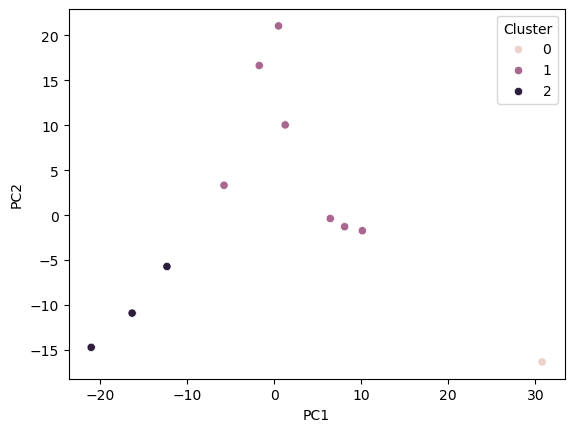

In [5]:
sns.scatterplot(data=cluster_df, x='PC1', y='PC2', hue='Cluster')


In [6]:

'''
3 Cluster results:

0 - XLB, XLF, XLI, XLK,XLV,XLY
1 - XLU, XLP
2 - XLE

5 cluster results:

0 - XLB, XLF, XLI
1 - XLU
2 - XLE
3 - XLP
4 - XLV, XLK, XLY
    

'''
cluster_df = cluster_df.sort_values(by='Cluster')

cluster_df


,ETF,Cluster,PC1,PC2
2,XLE,0,30.778168,-16.341013
0,XLB,1,6.439401,-0.377151
1,XLC,1,-1.722954,16.658804
3,XLF,1,10.127336,-1.733934
4,XLI,1,8.084241,-1.289626
5,XLK,1,0.494126,21.062448
9,XLV,1,-5.771064,3.323584
10,XLY,1,1.260396,10.041872
6,XLP,2,-12.329514,-5.717800
7,XLRE,2,-16.328655,-10.907436
